In [1]:
import os
import sys
import csv
import ast
import json
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

In [2]:
## parameters and packages for plotting with seaborn, matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize']=(8, 6)
sns.set()
sns.set_context()
sns.set_palette(sns.color_palette("deep"))

In [3]:
## File containing class for creating home objects

import HomeDataClasses as HD

## Create home objects from HomeDataClasses for reading in raw env data
These steps contain very minimal processing.

Summary files are written and CSVs from the RAW data (by day, hub)

In [4]:
import collections
HomeObj = collections.namedtuple('HomeObj', 'name sensors pi')

Named tuples are used for specifying the home, the hubs used, and if pi data exists

In [5]:
H1_red = HomeObj('H1-red', ['RS1', 'RS2', 'RS3', 'RS4', 'RS5'], True)
H1_black = HomeObj('H1-black', ['BS1', 'BS2', 'BS3', 'BS4', 'BS5', 'BS6'], True)
H2_red = HomeObj('H2-red', ['RS1', 'RS2', 'RS4', 'RS5'], True)
H3_red = HomeObj('H3-red', ['RS1', 'RS2', 'RS3', 'RS4', 'RS5'], False)
H3_black = HomeObj('H3-black', ['BS1', 'BS2', 'BS3', 'BS4', 'BS5', 'BS6'], False)
H4_red = HomeObj('H4-red', ['RS1', 'RS2', 'RS3', 'RS4', 'RS5'], True)
H5_red = HomeObj('H5-red', ['RS1', 'RS2', 'RS3', 'RS4', 'RS5'], True)
H6_black = HomeObj('H6-black', ['BS2', 'BS3', 'BS4', 'BS5'], True)

Functions for reading in data from jsons and creating each home instance

In [6]:
localDir = '/Users/maggie/Desktop/HPD_mobile_data/HPD-env/HPD_mobile'

In [7]:
def Make_Full_DFs(home, root_loc=localDir):
    root_dir = f'{root_loc}-{home.name.split("-")[0]}/{home.name}'
    print(root_dir)
    H = HD.ReadEnv(root_dir, home.sensors, home.pi)
    H.main()
    return H.all_dfs


def join_all(dfs):
    all_dfs = [dfs[hub] for hub in dfs]
    full_df = pd.concat(all_dfs)
    full_df['time'] = full_df.index
    return full_df

All data is read in and then full dataframes are created, combining all hubs into one (verticially) in "tidy data" format (for plotting)

In [8]:
H1_red_data = Make_Full_DFs(H1_red)
H1_Red_Full = join_all(H1_red_data)

H1_black_data = Make_Full_DFs(H1_black)
H1_Black_Full = join_all(H1_black_data)

H2_red_data = Make_Full_DFs(H2_red)
H2_Red_Full = join_all(H2_red_data)

H3_red_data = Make_Full_DFs(H3_red)
H3_Red_Full = join_all(H3_red_data)

H3_black_data = Make_Full_DFs(H3_black)
H3_Black_Full = join_all(H3_black_data)

H4_red_data = Make_Full_DFs(H4_red)
H4_Red_Full = join_all(H4_red_data)

H5_red_data = Make_Full_DFs(H5_red)
H5_Red_Full = join_all(H5_red_data)

H6_black_data = Make_Full_DFs(H6_black)
H6_Black_Full = join_all(H6_black_data)

/Users/maggie/Desktop/HPD_mobile_data/HPD-env/HPD_mobile-H1/H1-red

> working on: H1-red RS1
> reading in data from: /Users/maggie/Desktop/HPD_mobile_data/HPD-env/HPD_mobile-H1/H1-red/RS1/env_params
> cleaning dates on df of length: 409254
> gathering data from pi...
> reading in data from: /Users/maggie/Desktop/HPD_mobile_data/HPD-env/HPD_mobile-H1/H1-red/RS1/env_params_from_pi
> cleaning dates on df of length: 21148
> merging dfs...
> final df of length: 425884
> Making and writing csvs by day.
> Completed writing csvs.
/Users/maggie/Desktop/HPD_mobile_data/HPD-env/HPD_mobile-H1/H1-red/DataSummaries/H1-RS1-data-summary.txt : Write Sucessful!

> working on: H1-red RS2
> reading in data from: /Users/maggie/Desktop/HPD_mobile_data/HPD-env/HPD_mobile-H1/H1-red/RS2/env_params
> cleaning dates on df of length: 415736
> gathering data from pi...
> reading in data from: /Users/maggie/Desktop/HPD_mobile_data/HPD-env/HPD_mobile-H1/H1-red/RS2/env_params_from_pi
> cleaning dates on df of length:

KeyboardInterrupt: 

***
## Create smaller dfs for testing things. 

Start day is specified and length of df (in days)

In [24]:

B1_s = '2019-03-18'
R1_s = '2019-11-18'
R2_s = '2019-03-18'
B3_s = '2019-05-18'
R3_s = '2019-08-18'
R4_s = '2019-05-01'
R5_s = '2019-06-18'
B6_s = '2019-10-19'

day_range = 3


def make_small_df(df, start, time_length=day_range):
    deltaT = time_length-1
    end = (datetime.strptime(start, '%Y-%m-%d') + timedelta(days=deltaT)).strftime('%Y-%m-%d')
    new_df = df.loc[start : end]
    return new_df


small_H1_b = make_small_df(H1_Black_Full, B1_s)
small_H2_r = make_small_df(H2_Red_Full, R2_s)
small_H3_b = make_small_df(H3_Black_Full, B3_s)
small_H3_r = make_small_df(H3_Red_Full, R3_s)
small_H4_r = make_small_df(H4_Red_Full, R4_s)
small_H5_r = make_small_df(H5_Red_Full, R5_s)
small_H6_b = make_small_df(H6_Black_Full, B6_s)

all_small_hubs = [small_H1_b, small_H1_r, small_H2_r, small_H3_b, small_H3_r, small_H4_r, small_H5_r, small_H6_b]


***
## Create "cleaned" dataframes

- First, adding all missing times (rows) and filling with nan
- Next, filling missing rows with previous value, with a limit (5mins)
- And, filling missing rows with next values, with a limit (5mins)

- Then, find values that drop too much
- Fill, forward with limit

- And, find values that jump too much
- Fill, forward with limit

Record this process, add columns for manipulated vars (a,b,c,...)

In [334]:
T_rate = 2
RH_rate = 5
fill_limit=30


def clean_tempRH(full_df, T=T_rate, RH=RH_rate, L=fill_limit, loop_limit=12):
    name = [x for x in globals() if globals()[x] is full_df][0].strip("_Full")
    print(name)
    dfs = {}
    for hub in full_df['hub'].unique():
        print(hub)
        df = full_df.loc[full_df['hub'] == hub].copy()
        
        df['missingT'] = 0
        df['missingRH'] = 0
        
        df.loc[df['temp_c'].isna(), 'missingT'] = 'A'
        df.loc[df['rh_percent'].isna(), 'missingRH'] = 'A'

        df['Modified_T'] = 0
        df['Modified_RH'] = 0
        
        df = df.asfreq(freq='10S', fill_value=np.nan)
        
        df['temp_c'].fillna(method='ffill', inplace=True, limit=L)
        df['temp_c'].fillna(method='bfill', inplace=True, limit=L)        
        df['Modified_T'].fillna('B', inplace=True)
        
        df['rh_percent'].fillna(method='ffill', inplace=True, limit=L)
        df['rh_percent'].fillna(method='bfill', inplace=True, limit=L)        
        df['Modified_RH'].fillna('B', inplace=True)

        df.loc[df['rh_percent'] > 100, ['rh_percent', 'Modified_RH']] = [np.nan, 'D']
        df['rh_percent'].fillna(method='ffill', inplace=True, limit=L)        
        
        for x in range(0, loop_limit):
            df.loc[df['temp_c'].diff() <= -T, ['temp_c', 'Modified_T']] = [np.nan, 'CL']
            df['temp_c'].fillna(method='ffill', inplace=True, limit=L)
            
            df.loc[df['rh_percent'].diff() <= -RH, ['rh_percent', 'Modified_RH']] = [np.nan, 'CL']
            df['rh_percent'].fillna(method='ffill', inplace=True, limit=L)

            
        for x in range(0, loop_limit):
#             df.loc[df['temp_c'].diff() >= T, ['temp_c', 'Modified_T']] = [np.nan, 'CH']
#             df['temp_c'].fillna(method='ffill', inplace=True, limit=L)
            
            df.loc[df['rh_percent'].diff() >= RH, ['rh_percent', 'Modified_RH']] = [np.nan, 'CH']
            df['rh_percent'].fillna(method='ffill', inplace=True, limit=L)

    
        df.loc[df['missingT'] == 'A', 'Modified_T'] = 'A'
        df.loc[df['missingRH'] == 'A', 'Modified_RH'] = 'A'

        df = df.drop(columns = ['missingT', 'missingRH', 'time'])   

        df.loc[df['temp_c'].isna(), 'Modified_T'] = 'X'
        df.loc[df['rh_percent'].isna(), 'Modified_RH'] = 'X'

        df['hub'].fillna(hub, inplace=True)

        folder_name = make_storage_directory(f'/Users/maggie/Desktop/cleaned_dfs/{name}')
        df.to_csv(os.path.join(folder_name, f'df-{hub}.csv'), index_label = 'timestamp', index = True)
        
        dfs[hub] = df

    all_dfs = [dfs[hub] for hub in dfs]
    full_cleaned = pd.concat(all_dfs)
    full_cleaned['time'] = full_cleaned.index
    
    print(len(full_cleaned))
    return full_cleaned

        
     
        

# full_cleaned_H1_Red = clean_temperature(H1_Red_Full)

Generate all new DFs after cleaning temperature and relative humidity

In [335]:

full_cleaned_H1_Black = clean_tempRH(H1_Black_Full)
full_cleaned_H1_Red = clean_tempRH(H1_Red_Full)
full_cleaned_H2_Red = clean_tempRH(H2_Red_Full)
full_cleaned_H3_Black = clean_tempRH(H3_Black_Full)
full_cleaned_H3_Red = clean_tempRH(H3_Red_Full)
full_cleaned_H4_Red = clean_tempRH(H4_Red_Full)
full_cleaned_H5_Red = clean_tempRH(H5_Red_Full)
full_cleaned_H6_Black = clean_tempRH(H6_Black_Full)



H1_Black
BS1
BS2
BS3
BS4
BS5
BS6
2473902
H1_Red
RS1
RS2
RS3
RS4
RS5
2196348
H2_Red
RS1
RS2
RS4
RS5
1129374
H3_Black
BS1
BS2
BS3
BS4
BS5
BS6
3089904
H3_Red
RS1
RS2
RS3
RS4
RS5
2247738
H4_Red
RS1
RS2
RS3
RS4
RS5
1548054
H5_Red
RS1
RS2
RS3
RS4
RS5
1178106
H6_Black
BS2
BS3
BS4
BS5
2173638


In [277]:

def check_length(df):
    print(df.index[0], df.index[-1])
    print(len(df))
    n = int(np.ceil(len(df)/3))
    print(n)
    for g, tf in df.groupby(np.arange(len(df)) // n):
        print(tf.shape)
        tf.to_csv(f'/Users/maggie/Desktop/hub_raw_{g}.csv', index_label = 'timestamp', index = False)
    

check_length(H1_Red_Full)

2019-11-05 15:38:00 2019-12-26 12:29:50
2119960
706654
(706654, 11)
(706654, 11)
(706652, 11)


***
## Plotting and examining the data

In [336]:
# Plotting Temperature time series

def PlotTemps(df, name):
    print(f'Plotting {name} temperature')
    ax = sns.relplot(x='time', y='temp_c', hue='hub', kind='scatter', linewidth=0.05, height=6, aspect=2.7, data=df, s=30);
    ax.set(xlim=(df['time'].min(), df['time'].max()))#, ylim=(-2,38))
#     plt.axhline(17, ls='--')
    plt.xlabel('Date', fontsize=24)
    plt.ylabel('Temperature C', fontsize=24)
    plt.title(name, fontsize=38)
    plt.show()
    ax.savefig(f'/Users/maggie/Desktop/data_exploration_images/cleaned/{name}-temp.png')


def PlotRH(df, name):
    print(f'Plotting {name} relative humidity')
    ax = sns.relplot(x='time', y='rh_percent', hue='hub', kind='scatter', linewidth=0.05, height=6, aspect=2.7, data=df, s=30);
    ax.set(xlim=(df['time'].min(), df['time'].max()))#, ylim=(0,75))
#     plt.axhline(100, ls='--')
    plt.xlabel('Date', fontsize=24)
    plt.ylabel('Relative Humidity, %', fontsize=24)
    plt.title(name, fontsize=38)
    ax.savefig(f'/Users/maggie/Desktop/data_exploration_images/cleaned/{name}-rh.png')
    

def PlotLux(df, name):
    print(f'Plotting {name} lux')
    ax = sns.relplot(x='time', y='light_lux', hue='hub', kind='scatter', linewidth=0.05, height=8, aspect=3, data=df, s=30);
    ax.set(xlim=(df['time'].min(), df['time'].max()))
    plt.xlabel('Date', fontsize=24)
    plt.ylabel('Illuminance, Lux', fontsize=24)
    plt.title(name, fontsize=38)
    ax.savefig(f'/Users/maggie/Desktop/data_exploration_images/lux/{name}.png')    
    
##    
def PlotDist(df, name):
    print(f'Plotting {name} distance')    
    ax = sns.relplot(x='time', y='dist_mm', hue='hub', kind='scatter', linewidth=0.05, height=8, aspect=3, data=df, s=30);
    ax.set(xlim=(df['time'].min(), df['time'].max()))
    plt.xlabel('Date', fontsize=24)
    plt.ylabel('Distance, mm', fontsize=24)
    plt.title(name, fontsize=38)
    ax.savefig(f'/Users/maggie/Desktop/data_exploration_images/dist/{name}.png')   
    
    
def PlotTVOC(df, name):
    print(f'Plotting {name} tvoc')
    ax = sns.relplot(x='time', y='tvoc_ppb', hue='hub', kind='scatter', linewidth=0.05, height=8, aspect=3, data=df, s=30);
    ax.set(xlim=(df['time'].min(), df['time'].max()), ylim=(0,2000))
    plt.xlabel('Date', fontsize=24)
    plt.ylabel('TVOC, ppb', fontsize=24)
    plt.title(name, fontsize=38)
    ax.savefig(f'/Users/maggie/Desktop/data_exploration_images/tvoc_wmax_2k/{name}.png')   
    
def PlotCO2(df, name):
    print(f'Plotting {name} co2')
    ax = sns.relplot(x='time', y='co2eq_ppm', hue='hub', kind='scatter', linewidth=0.05, height=6, aspect=3, data=df, s=30);
    ax.set(xlim=(df['time'].min(), df['time'].max()), ylim=(350,6000))
    plt.xlabel('Date', fontsize=24)
    plt.ylabel('CO2 Equivalent, ppm', fontsize=24)
    plt.title(name, fontsize=38)
    ax.savefig(f'/Users/maggie/Desktop/data_exploration_images/co2_wmax_6k/{name}.png')   
    
###    
def PlotAll(df, name, to_plot):
    for p in to_plot:
        p(df, name)
    print(f'Done plotting {name}')



# to_plot = [PlotTemps, PlotRH, PlotLux, PlotTVOC, PlotCO2]
# PlotTemps(full_cleaned_H1_Red, 'Cleaned Temperatures')

In [ ]:
# PlotAll(H1_Black_Full, 'H1 Black', to_plot)
# PlotAll(H1_Red_Full, 'H1 Red', to_plot)
# PlotAll(H2_Red_Full, 'H2 Red', to_plot)
# PlotAll(H5_Red_Full, 'H5 Red', to_plot)
# PlotAll(H3_Black_Full, 'H3 Black', to_plot)
# PlotAll(H4_Red_Full, 'H4 Red', to_plot)
# PlotAll(H6_Black_Full, 'H6 Black', to_plot)

In [323]:
def make_storage_directory(target_dir):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    return target_dir


def sigma_bounds(df, col, s=3):
    lower_sigma = df[col].mean() - s*df[col].std()
    upper_sigma = df[col].mean() + s*df[col].std()
    return (lower_sigma, upper_sigma)


def plot_bounds(df, home_name, col, name):
    print(home_name)
    for hub in df['hub'].unique():
        print(hub)
        plt.figure()
        hub_df = df.loc[df['hub'] == hub]
        sb = sigma_bounds(hub_df, col, s=8)

        s5 = sigma_bounds(hub_df, col, s=5)
        s4 = sigma_bounds(hub_df, col, s=4)
        s3 = sigma_bounds(hub_df, col, s=3)
#         print(s5, s4, s3)

        ax = sns.scatterplot(x='time', y=col, linewidth=0.05, s=20, data=hub_df)
        ax.set(xlim=(df['time'].min(), df['time'].max()))#, ylim=(0,sb[1]))        
#         plt.axhline(s5[0], ls='-', c='r')
        plt.axhline(s5[1], ls='-', c='r')
        
#         plt.axhline(s4[0], ls='--', c='g')
        plt.axhline(s4[1], ls='--', c='g')
        
#         plt.axhline(s3[0], ls='--', c='r')
        plt.axhline(s3[1], ls='--', c='r')
        
        plt.xlabel('Date', fontsize=18)
        plt.ylabel(name, fontsize=18)
#         plt.title(f'{home_name.replace("_", " ").strip("_Full")} - {hub}', fontsize=28)
        
#         target_fname = f'{home_name.strip("_Full")}-{hub}.png'

        plt.title(f'{home_name} - {hub}', fontsize=28)
        
        target_fname = f'{home_name}-{hub}.png'

        target_dir = make_storage_directory(f'/Users/maggie/Desktop/data_exploration_images/with_sigma_bounds_smaller_cleaned/{col}')
        plt.savefig(os.path.join(target_dir, target_fname))
        plt.close()

# plot_bounds(H1_Black_Full, 'H1 Black', col='temp_c', name='Temperature, C')

plot_bounds(full_cleaned_H1_Red, 'H1 Red cleaned', col='temp_c', name='Temperature, C')

to_plot = [('temp_c', 'Temperature, C'), ('co2eq_ppm', 'CO2 Equivalent, ppm'), ('tvoc_ppb', 'TVOC, ppb'), ('light_lux', 'Illuminance, Lux'), ('rh_percent', 'Relative Humidity, %')]

df_name = [(H1_Black_Full, 'H1 Black'), (H1_Red_Full, 'H1 Red'), (H2_Red_Full, 'H2 Red'), (H3_Black_Full, 'H3 Black'), 
           (H3_Red_Full, 'H3 Red'), (H4_Red_Full, 'H4 Red'), (H5_Red_Full, 'H5 Red'), (H6_Black_Full, 'H6 Black')]

H1 Red cleaned


TypeError: 'NoneType' object is not subscriptable

In [241]:
print(cleaned_H1_r['hub']=='nan')

timestamp
2019-11-05 15:38:00    False
2019-11-05 15:38:10    False
2019-11-05 15:38:20    False
2019-11-05 15:38:30    False
2019-11-05 15:38:40    False
                       ...  
2019-12-26 12:29:10    False
2019-12-26 12:29:20    False
2019-12-26 12:29:30    False
2019-12-26 12:29:40    False
2019-12-26 12:29:50    False
Name: hub, Length: 2196348, dtype: bool


Plotting H1 Black temperature


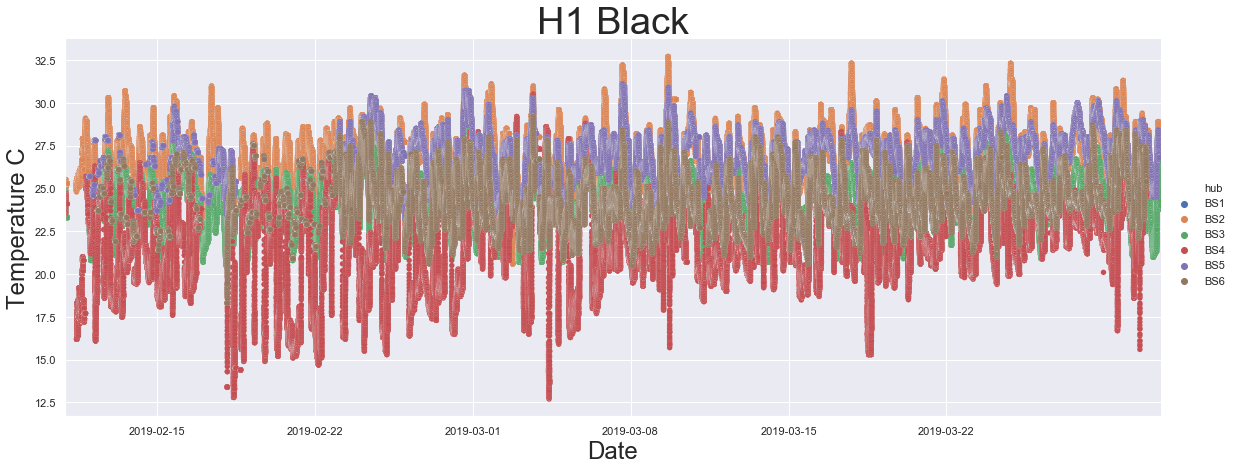

Plotting H1 Black relative humidity
Plotting H1 R temperature


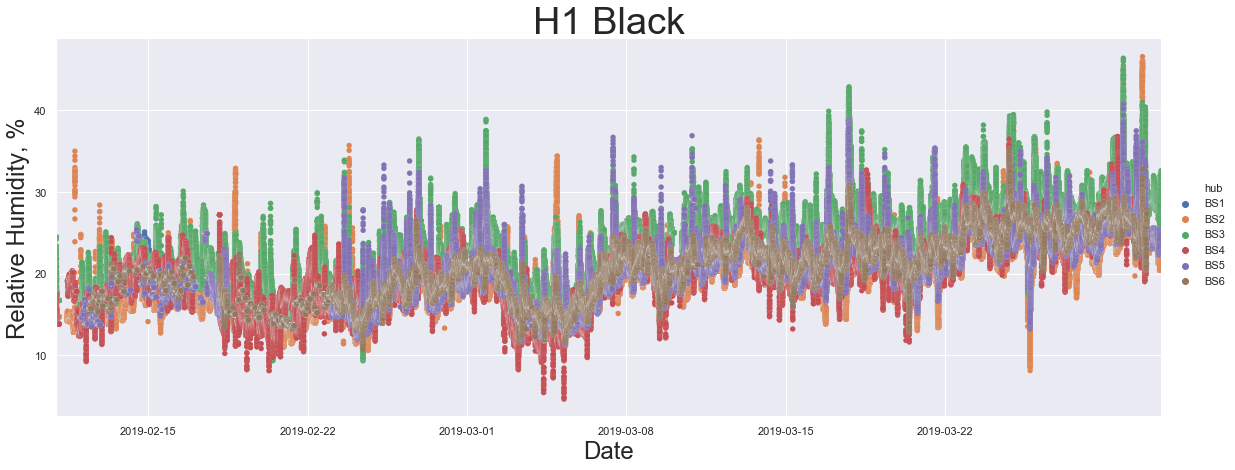

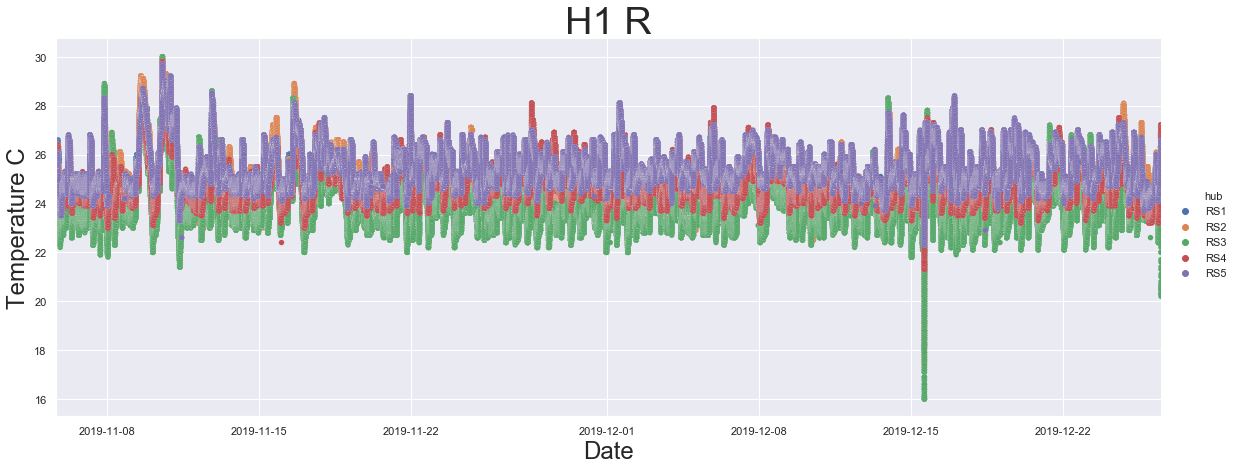

Plotting H1 R relative humidity
Plotting H2 R temperature


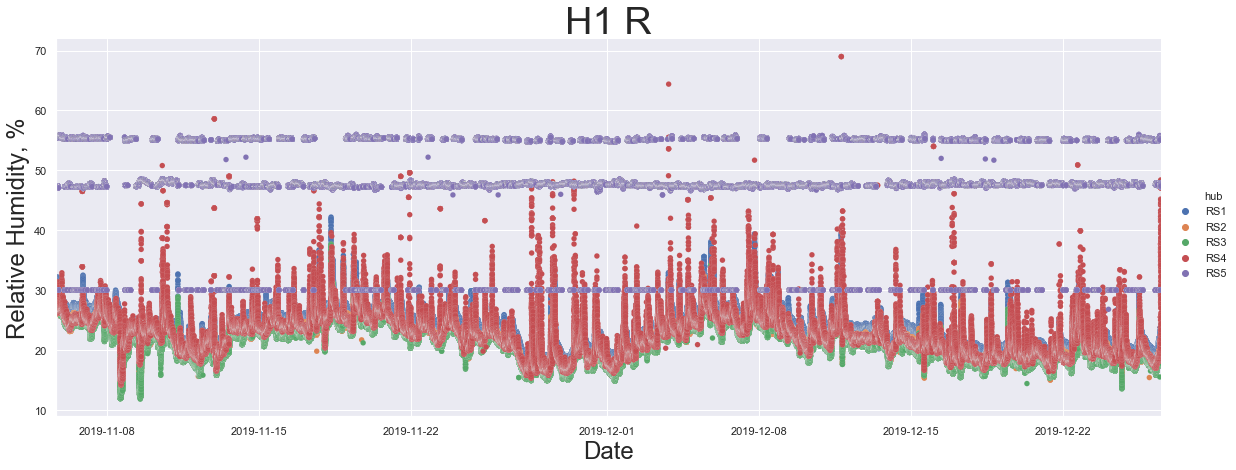

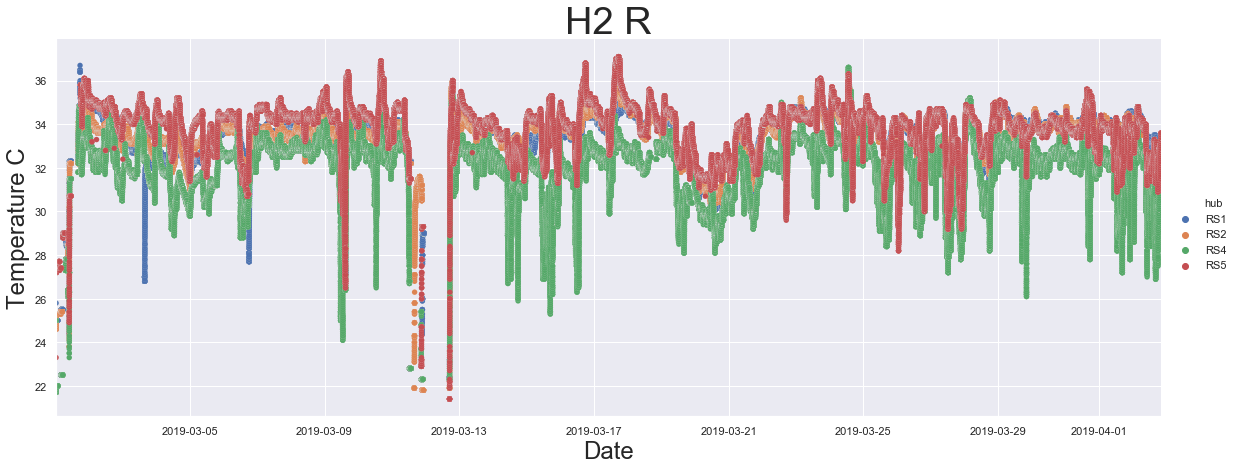

Plotting H2 R relative humidity
Plotting H3 Black temperature


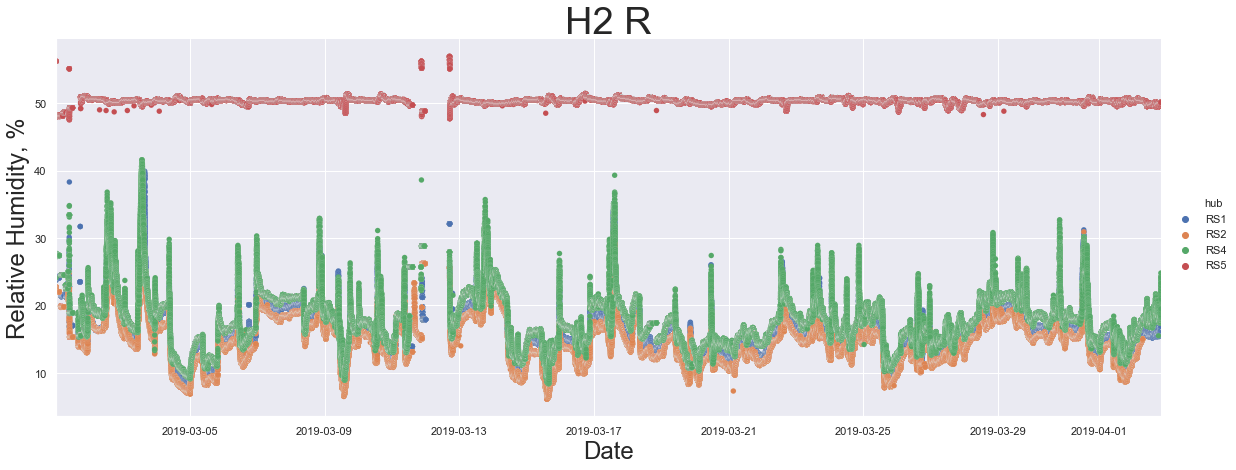

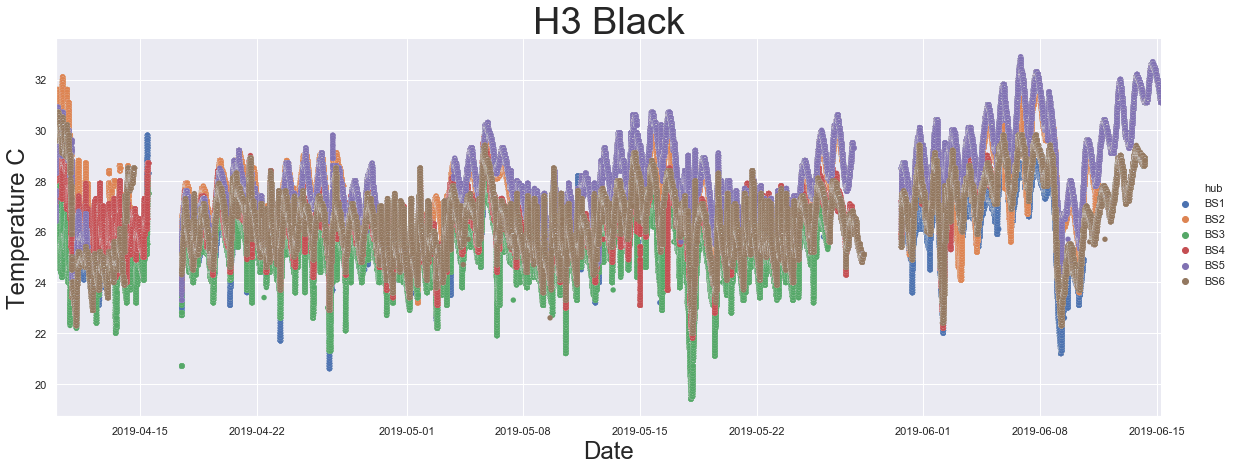

Plotting H3 Black relative humidity
Plotting H3 R temperature


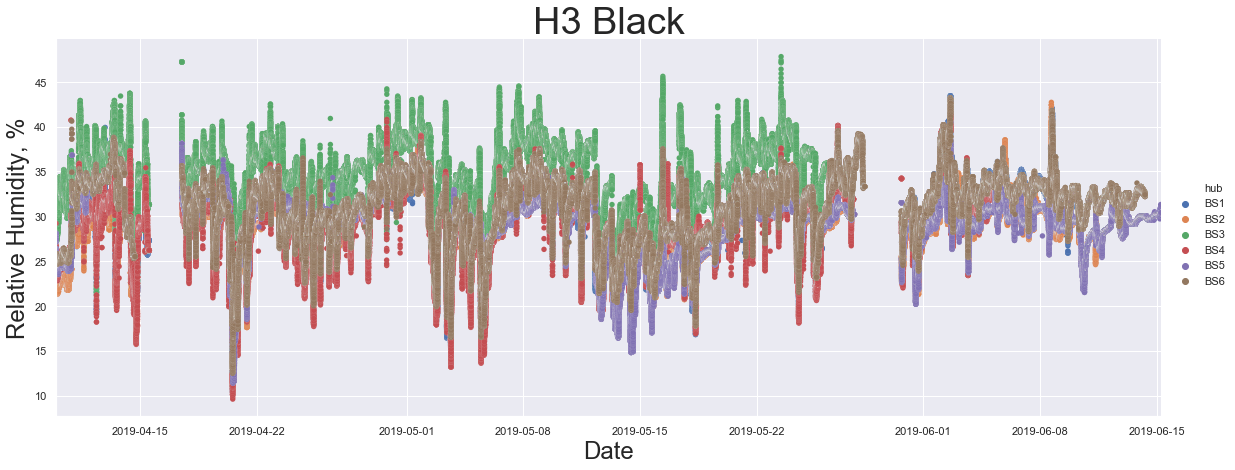

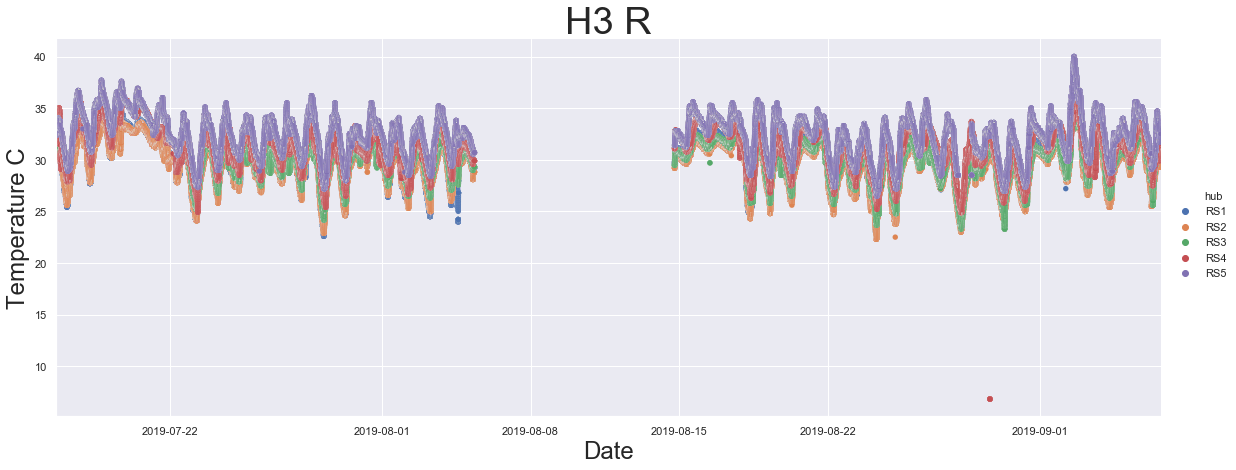

Plotting H3 R relative humidity
Plotting H4 R temperature


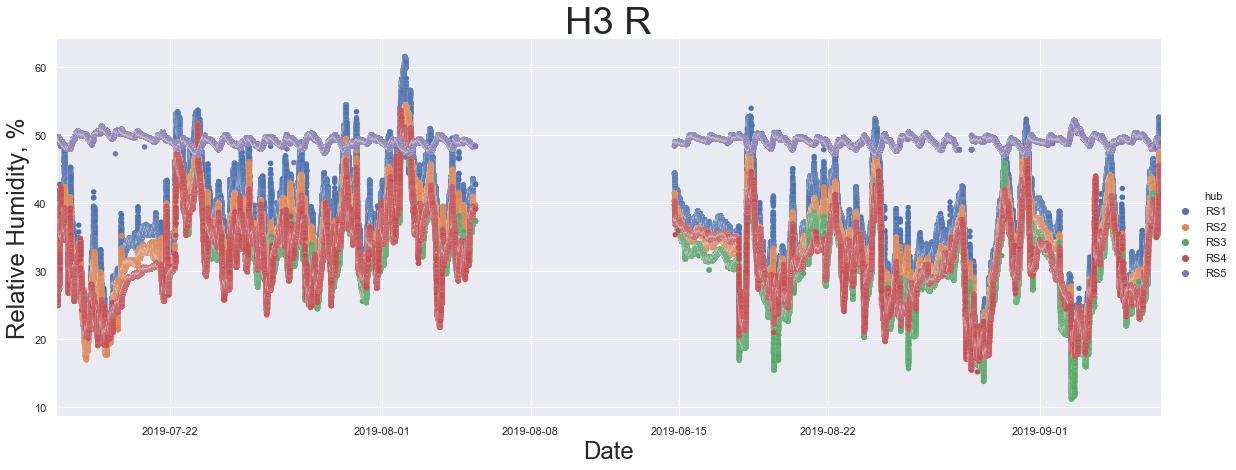

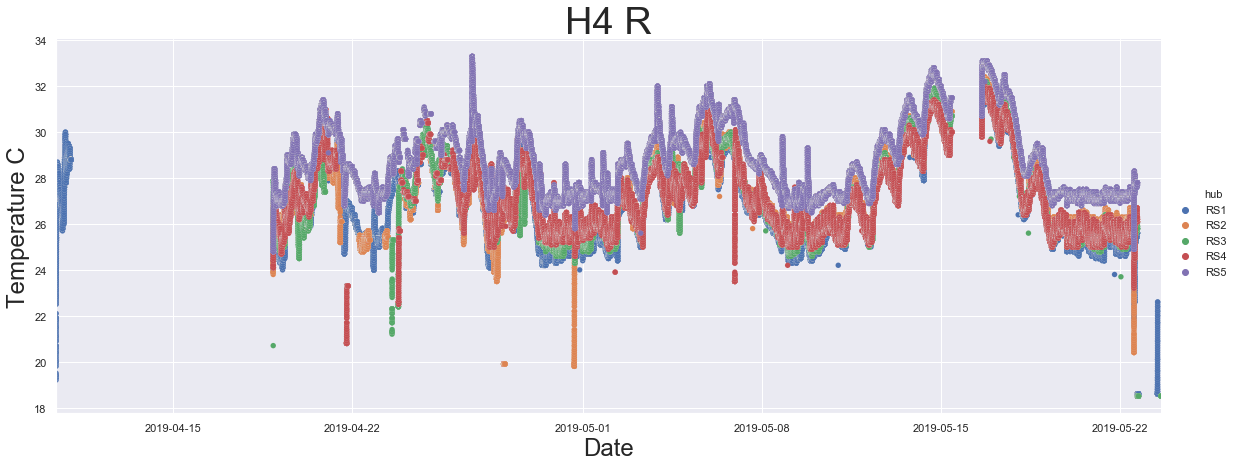

Plotting H4 R relative humidity
Plotting H5 R temperature


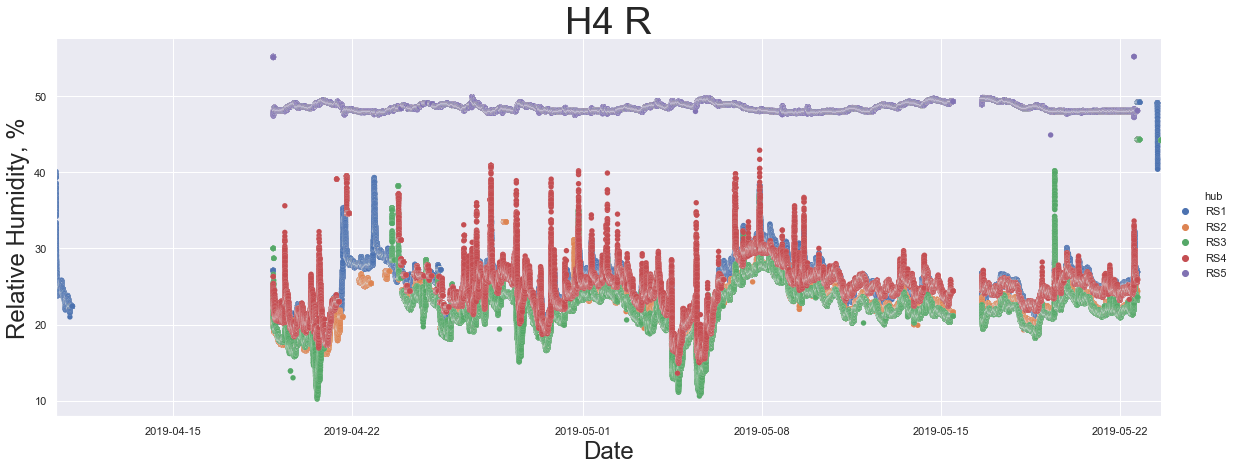

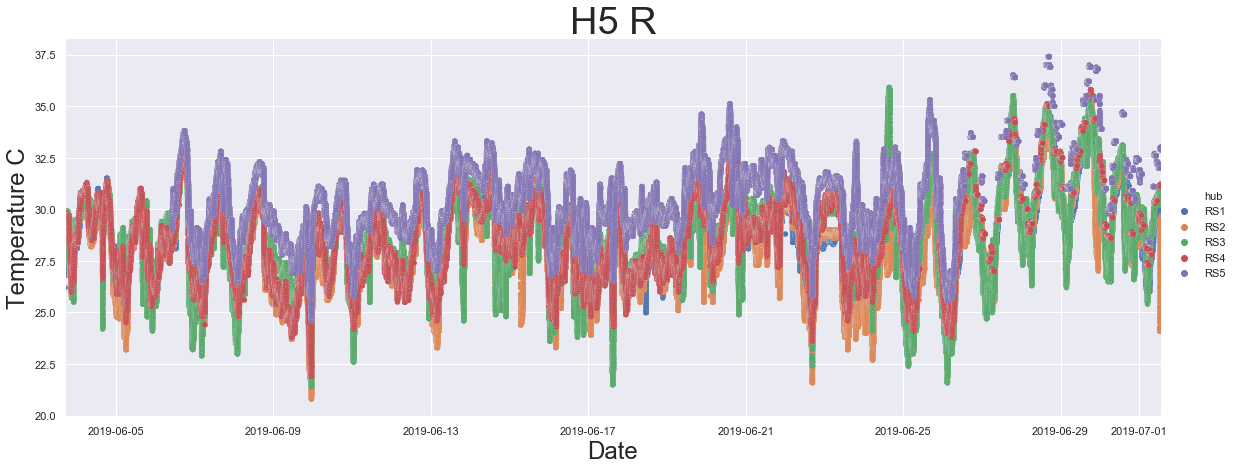

Plotting H5 R relative humidity
Plotting H6 Black temperature


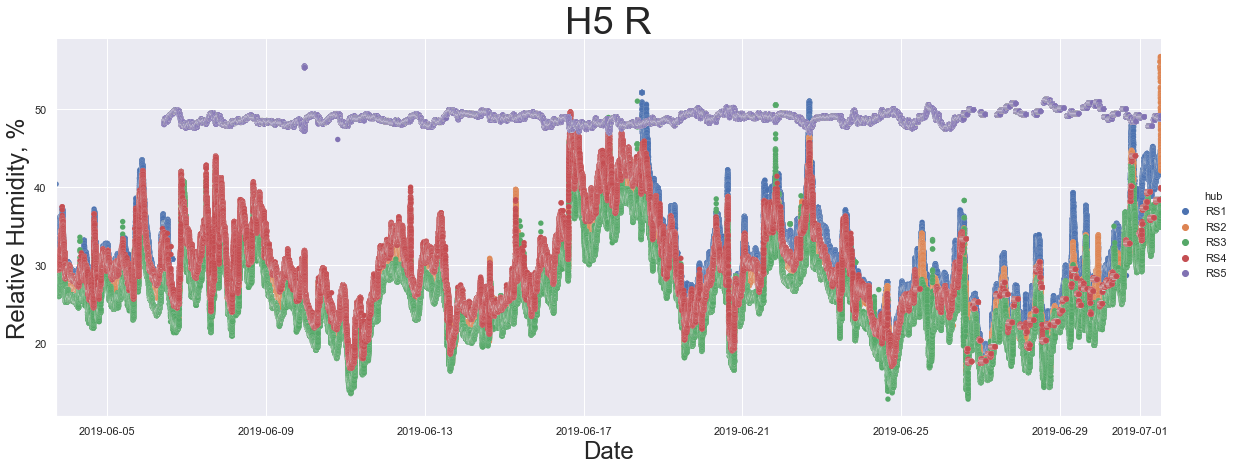

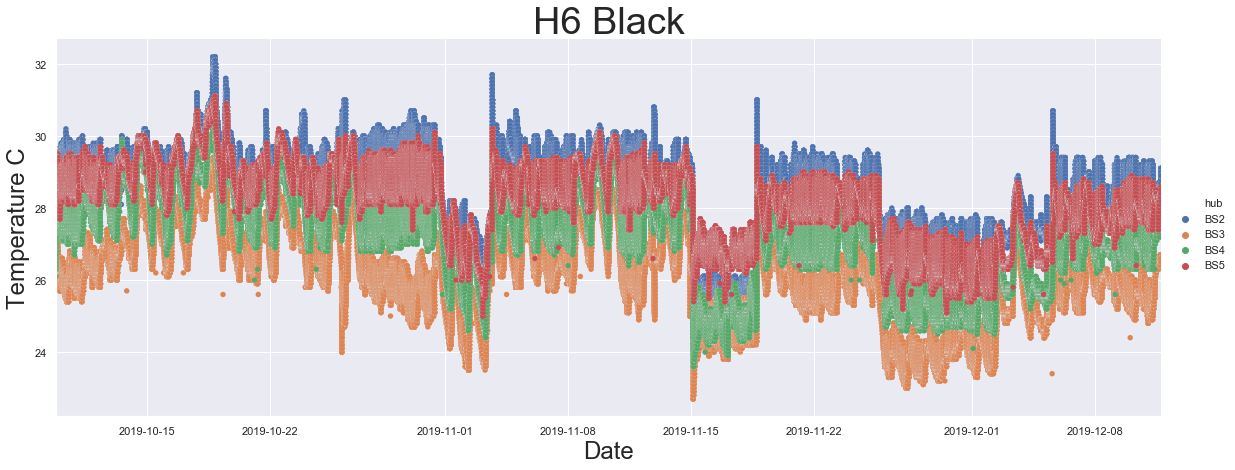

Plotting H6 Black relative humidity


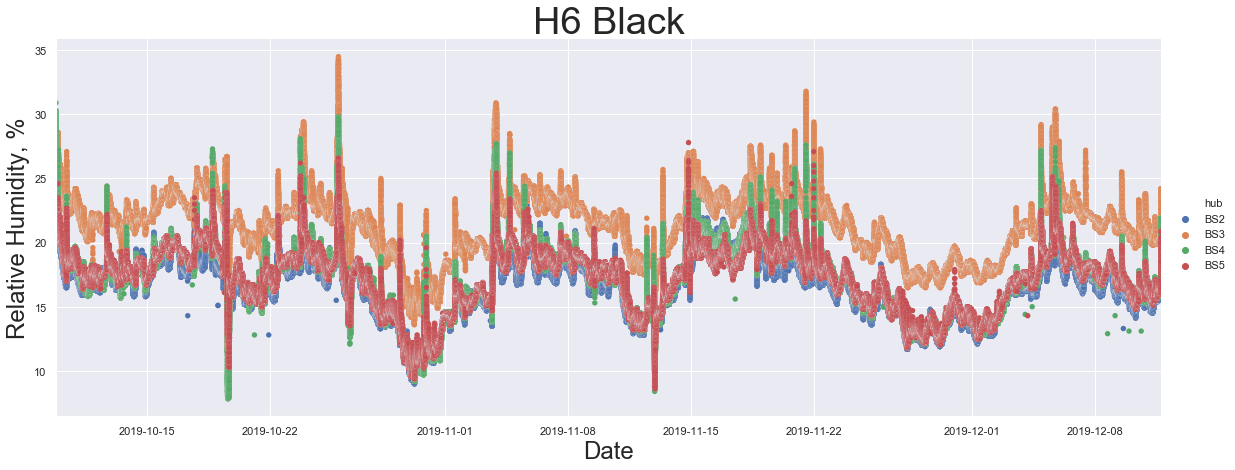

In [339]:
small_df = [(x, y[1]) for x, y in zip(all_small_hubs, df_name)]



all_cleaned = [full_cleaned_H1_Black, full_cleaned_H1_Red, full_cleaned_H2_Red, full_cleaned_H3_Black, 
               full_cleaned_H3_Red, full_cleaned_H4_Red, full_cleaned_H5_Red, full_cleaned_H6_Black]           
cleaned_dfs = [(x, y[1].strip('full_cleaned')) for x, y in zip(all_cleaned, df_name)]
                
                
to_plot = [PlotTemps, PlotRH]
           
                
def plot_mod(mod, name_list=df_name):
    for df in name_list:
        plot_bounds(df[0], df[1], col=mod[0], name=mod[1])
        
for df in cleaned_dfs:
    for mod in to_plot:
        mod(df[0], df[1].replace('-', ' '))
        
# for mod in to_plot:
#     plot_mod(mod)
# plot_mod(to_plot[3], name_list=small_df)

Plotting H1 Black co2
Plotting H1 Red co2
Plotting H2 Red co2
Plotting H3 Black co2
Plotting H3 Red co2
Plotting H4 Red co2
Plotting H5 Red co2
Plotting H6 Black co2


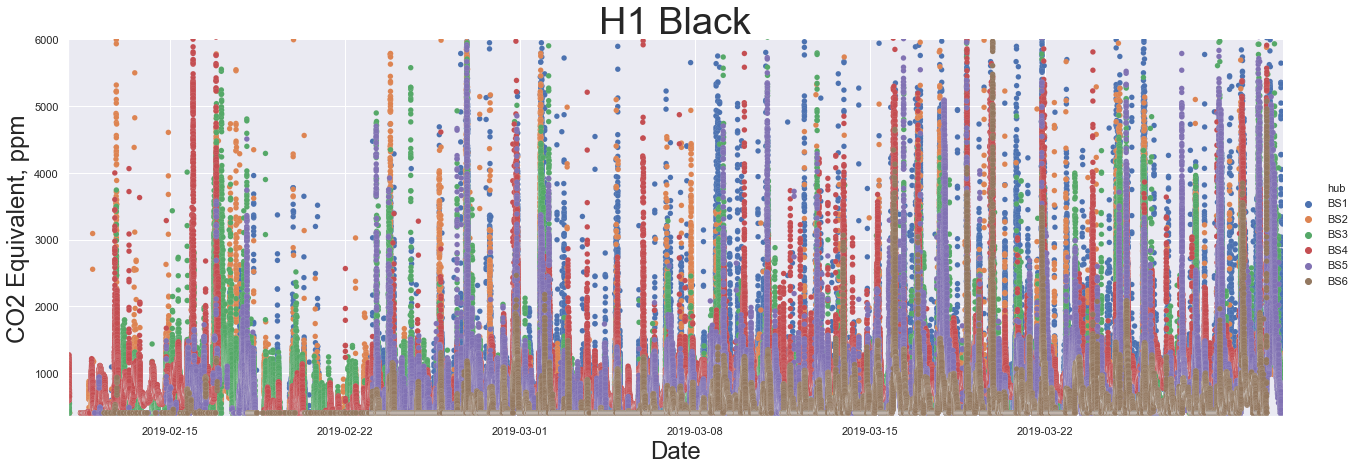

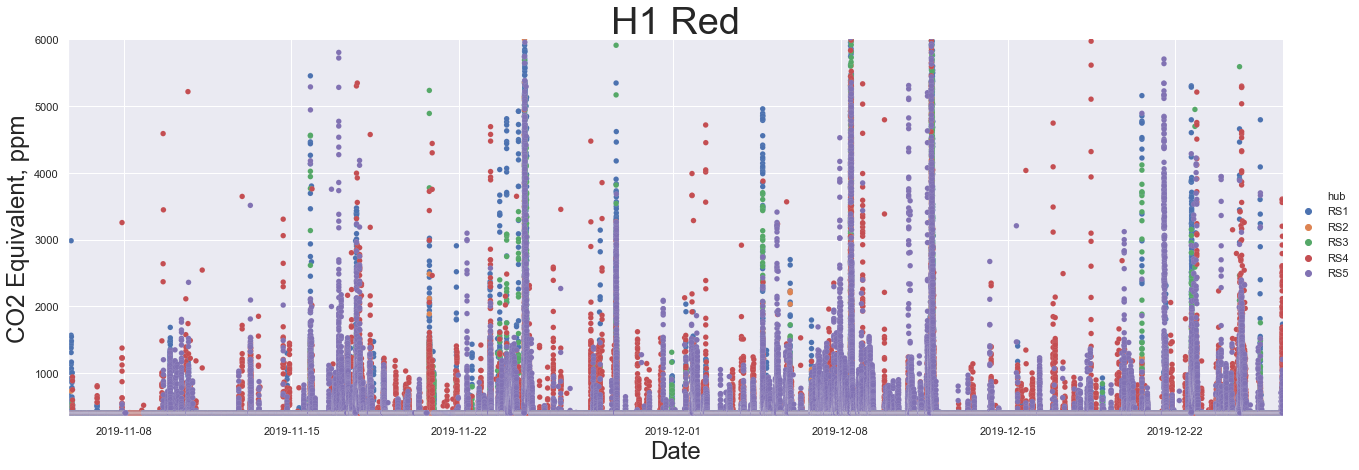

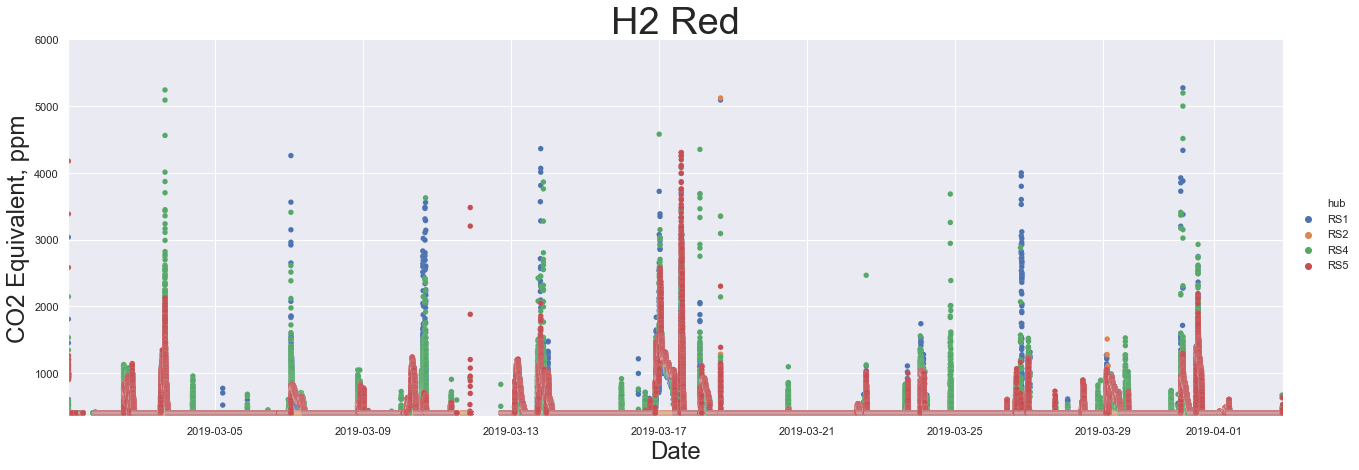

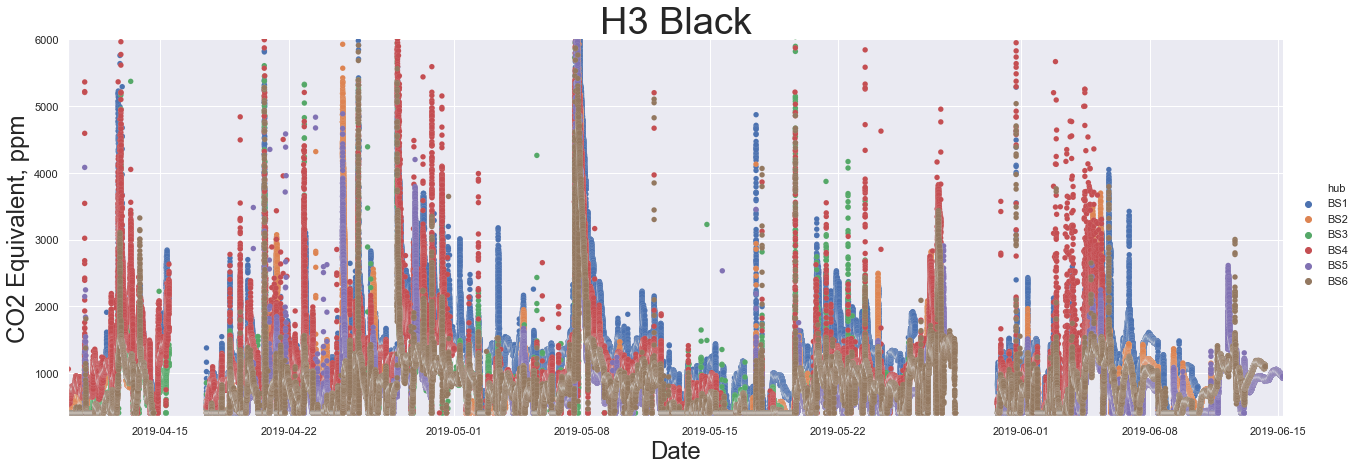

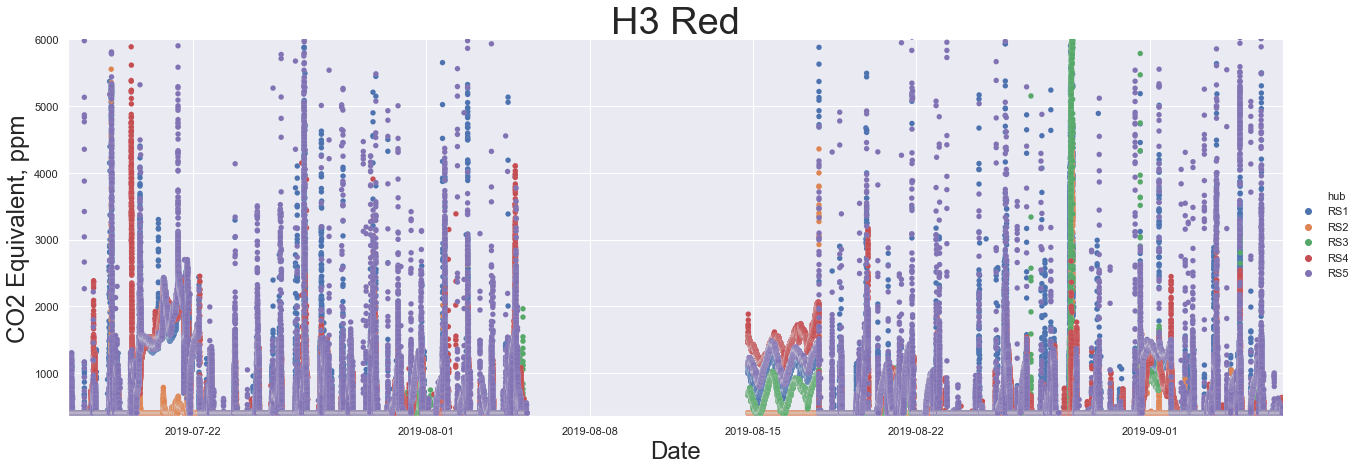

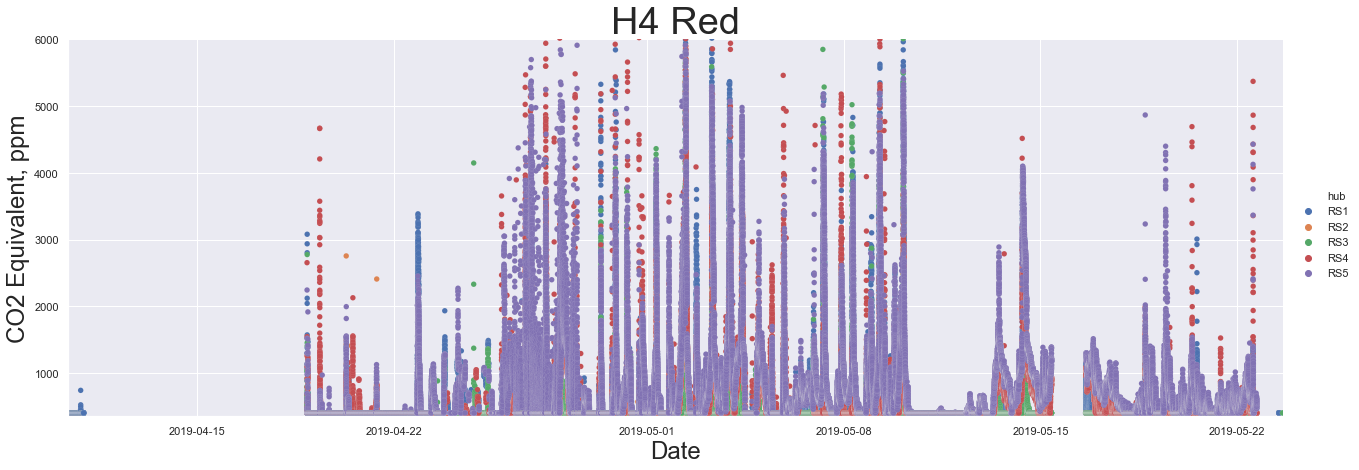

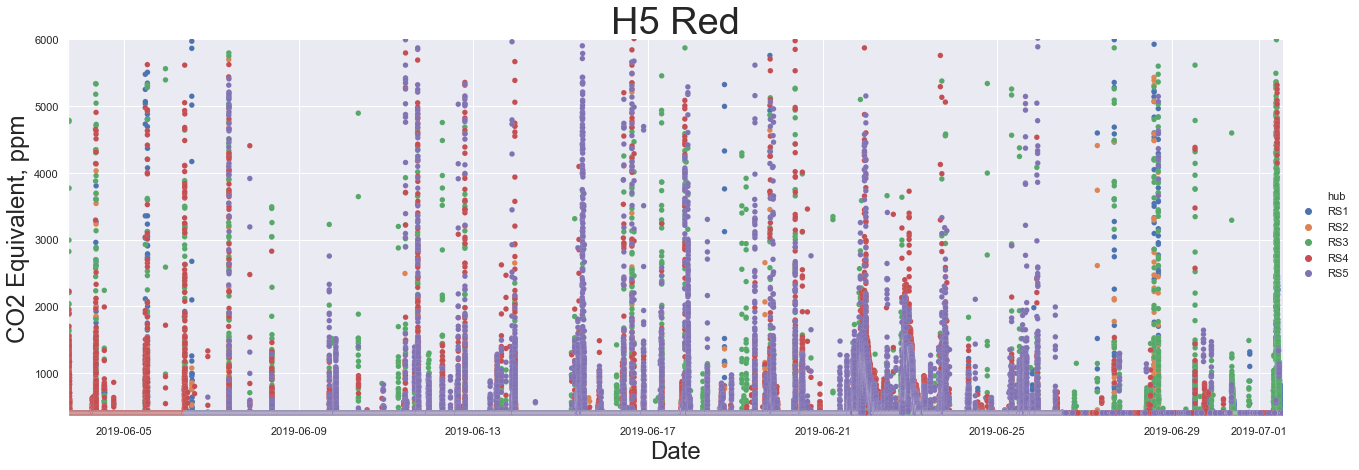

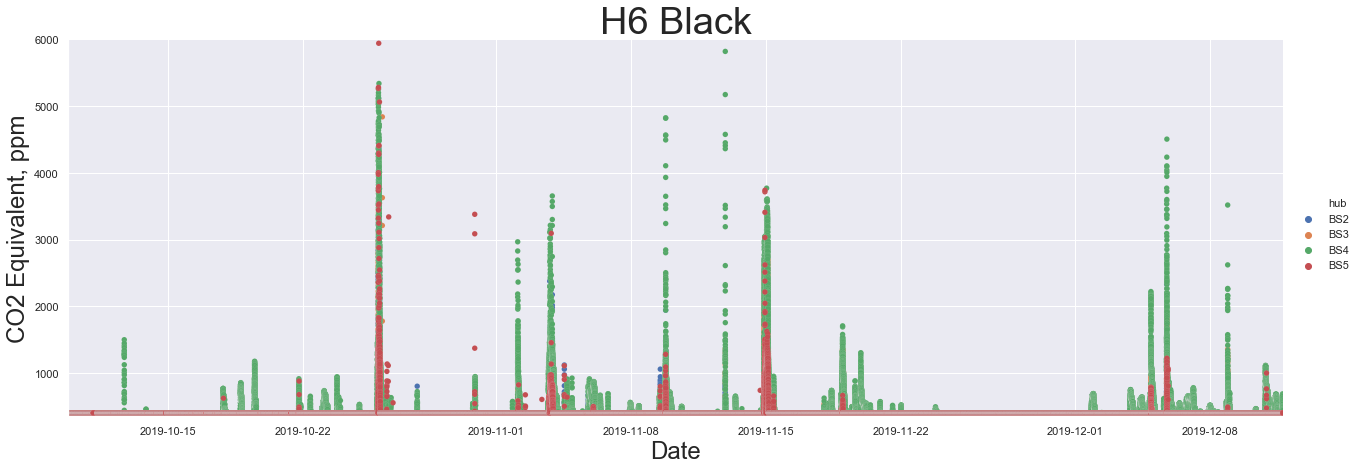

In [69]:
for h in df_name:
    PlotCO2(h[0], h[1])

***
### Calculate statistics about the data

In [397]:
def calculate_percent_outside(list_of_dfs, col, sigma_range):
    all_sigma = []
    for S in sigma_range:
        total = []
        fname = f'/Users/maggie/Desktop/percent_in_{S}sigma_{col}.txt'
        with open (fname, 'w+') as writer:
            for home in list_of_dfs:
                df = home[0]
                all_hubs = []
                writer.write(f'{home[1]}: ')

                for hub in df['hub'].unique():
                    hub_df = df.loc[df['hub'] == hub]
                    sigma = sigma_bounds(hub_df, col, s=S)
                    t = sum(hub_df[col].between(sigma[0],sigma[1]))
                    perc = t/len(hub_df)
                    perc_s = f'{perc:.4}'
                    if perc == 0.0:
                        print(f'{home[1]}, {hub}, {col} is 0.0')
                    else:
                        all_hubs.append(perc)
                    writer.write(f'{perc_s}, ')
                home_mean = np.mean(all_hubs)
                total.append(home_mean)
                writer.write(f'total: {home_mean:.4}\n')
                T = f'{np.mean(total):.4}'
            writer.write(f'\nAll Total:  {T}\n')    
        writer.close()
        all_sigma.append(np.float(T))
#         print(f'{fname} : Write Sucessful!')
#         print(f'{col}: {T}')
    return(all_sigma)


In [400]:
sigma = [2,3,4,5,6]
for mod in to_plot:
    s = calculate_percent_outside(df_name, mod[0], sigma)
    print(mod[0], [x for x in s])

temp_c [0.8867, 0.9221, 0.9251, 0.9257, 0.9259]
co2eq_ppm [0.981, 0.9894, 0.9937, 0.996, 0.9972]
tvoc_ppb [0.9766, 0.9875, 0.9919, 0.9943, 0.996]
light_lux [0.9533, 0.9805, 0.9921, 0.9959, 0.9981]
rh_percent [0.9142, 0.9252, 0.9259, 0.926, 0.926]


***

In [258]:
def BoxTemps(df_full, name):
    df = df_full[df_full.temp_c > 15]
    ax = sns.boxplot(x='hub', y='temp_c', data=df);
    plt.xlabel('Hub', fontsize=24)
    plt.ylabel('Temperature C', fontsize=24)
    plt.title(name, fontsize=38)
    plt.savefig(f'/Users/maggie/Desktop/data_exploration_images/box/temp-{name}.png')

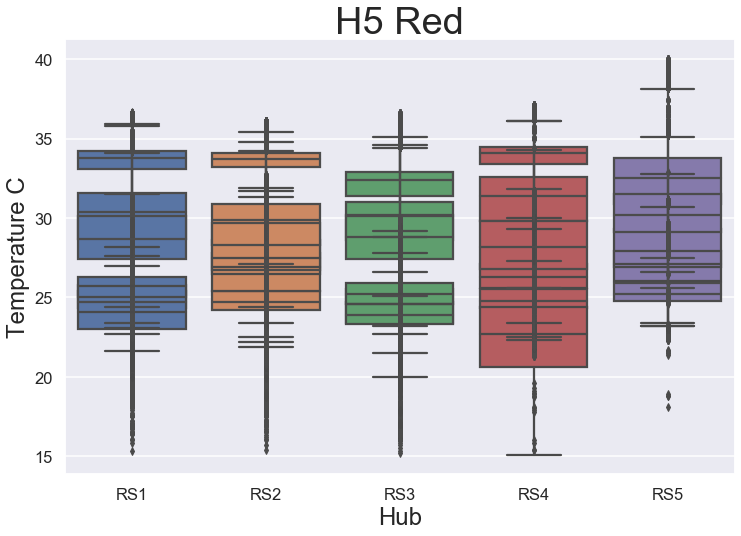

In [260]:
BoxTemps(H1_Red_Full, 'H1 Red')
BoxTemps(H1_Black_Full, 'H1 Black')
BoxTemps(H2_Red_Full, 'H2 Red')
BoxTemps(H3_Red_Full, 'H3 Red')
BoxTemps(H3_Black_Full, 'H3 Black')
BoxTemps(H5_Red_Full, 'H5 Red')

/Users/maggie/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



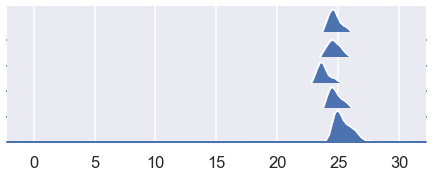

In [245]:
df = H1_Red_Full[['temp_c', 'hub']]

pal = sns.cubehelix_palette(5, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="hub", aspect=15, height=.5, palette=pal)
g.map(sns.kdeplot, "temp_c", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "temp_c", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)
g.fig.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)